test
Perry Fox 2023-12-13  
https://platform.stratascratch.com/data-projects/insights-city-supply-and-demand-data
# Project - Insights from City Supply and Demand Data
  
## Data Description
`datasets/` contains a single CSV file of rideshare data with the following seven columns:  
- `Date` - date in format dd-mm-yy   
- `Time (Local)` - hour of day 0-23  
- `Eyeballs` - Number of users who opened the Uber app  
- `Zeroes` - Number of users who did not see any car  
- `Requests` - Number of users who requested a car  
- `Completed Trips` - Number of users who completed a trip  
- `Unique Drivers` - Number of drivers who logged in

## Objective
Using the data files:

- [text](#anchor)

---

### Import and examine the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# What are we working with?
activity_df = pd.read_csv('datasets/dataset_1.csv')
activity_df.head(20)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [3]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


It looks like only the first row for a given day contains a value in the `Date` column. There are no other nulls that we have to deal with.  
We'll forward fill the date, adjust the formatting, and set it as the index for easier datetime operations.  
(Note for following cell: '%b' = Month's abbreviated name.) 

In [4]:
# forward fill the empty date rows
activity_df = activity_df.ffill()
# adjust date formatting, set as the index:
activity_df['Date'] = pd.to_datetime(activity_df['Date'], format='%d-%b-%y')
activity_df.set_index('Date', inplace=True)
# get rid of column header whitespace
activity_df.columns = activity_df.columns.str.replace(' ', '')
activity_df.head()

,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
Date,,,,,,
2012-09-10,7,5,0,2,2,9
2012-09-10,8,6,0,2,2,14
2012-09-10,9,8,3,0,0,14
2012-09-10,10,9,2,0,1,14
2012-09-10,11,11,1,4,4,11


Rock and roll. Now that that's set up, what else is going on with this data?

In [5]:
print(f'Date Range {activity_df.index.min()} to {activity_df.index.max()}.')

Date Range 2012-09-10 00:00:00 to 2012-09-24 00:00:00.


In [6]:
activity_df.describe()

,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


We're dealing with a time period of 15 days, and those numeric distributions above are good to be aware of.  
I noticed above that the first day starts on its 7th hour, and the second on 0, so I'm curious...

In [7]:
# count records by date number
activity_df.groupby(activity_df.index.day).count()['Time(Local)']

Date
10    17
11    24
12    24
13    24
14    24
15    24
16    24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24     7
Name: Time(Local), dtype: int64

Ok, so the first and last days on record are partial.

---

### Data Analysis 
#### 1. Which date had the most completed trips during the two week period?

In [8]:
# get the top five for added context:
activity_df.groupby('Date').sum() \
 .CompletedTrips.sort_values(ascending=False).head()

Date
2012-09-22    248
2012-09-15    199
2012-09-21    190
2012-09-23    111
2012-09-14    108
Name: CompletedTrips, dtype: int64

September 22nd, 2012 had the most completed trips with 248. 

---

#### 2. What was the highest number of completed trips within a 24 hour period?
Approach: use the Time(Local) field to turn the Date index into a timestamp, which will then make it easy to do a 24h rolling sum.

In [9]:
# add the hour part to the datetime index (and we'll just keep it like this.)
activity_df.index = \
    activity_df.index + pd.to_timedelta(activity_df['Time(Local)'], unit='h')

In [10]:
# sanity check
activity_df.head(2)

,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
2012-09-10 07:00:00,7,5,0,2,2,9
2012-09-10 08:00:00,8,6,0,2,2,14


In [11]:
# again, get the top 5 for context
activity_df['CompletedTrips'].rolling(window='24H').sum() \
    .nlargest(5)

2012-09-22 16:00:00    278.0
2012-09-22 15:00:00    274.0
2012-09-22 19:00:00    261.0
2012-09-22 14:00:00    260.0
2012-09-22 17:00:00    260.0
Name: CompletedTrips, dtype: float64

Here we can see of all the 24 hour periods, the one ending at 4pm on September 22nd had the highest number of completed trips at 278. 

---

#### 3. Which hour of the day had the most requests during the two week period?

In [12]:
activity_df.groupby('Time(Local)') \
    ['Requests'].sum().nlargest(5)

Time(Local)
23    184
22    174
19    156
0     142
18    119
Name: Requests, dtype: int64

11pm had the most requests during this period. That makes sense.

#### What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

friday Time(Local) 3 to sunday Time(local) 3

In [13]:
# Create a boolean mask that isolates the weekends
#     index.dayofweek returns an int, where monday == 0 
weekend_mask = (
    ((activity_df.index.dayofweek == 4) & (activity_df['Time(Local)'] >= 17)) |
    (activity_df.index.dayofweek == 5) |
    ((activity_df.index.dayofweek == 6) & (activity_df['Time(Local)'] < 3))
)

In [14]:
round( activity_df[weekend_mask].Zeroes.sum() / activity_df.Zeroes.sum(), 4)

0.4486

44.86% of all zeroes occur on the weekend hours.

---

#### 5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

We are looking for a single number: 0.828...  
The regular average is 0.474...

In [15]:
# Here's the non-weighted mean as kind of an intermediate sanity check.
#     A 0 in only the UniqueDrivers column will result in an inf when doing the mean calc.
#     A 0 in both CompletedTrips and UniqueDrivers will result in a Null, so we deal with these
(activity_df.CompletedTrips/activity_df.UniqueDrivers)\
    .replace([np.inf, -np.inf], np.nan).dropna().mean()

0.47433978769378704

In [16]:
# put the ratio in the original df
activity_df['driver_complete_trip_ratio'] = \
    (activity_df.CompletedTrips/activity_df.UniqueDrivers)

In [17]:
# get rid of nonzero unique driver rows to avoid nans and infs
activity_df_uds = activity_df[activity_df['UniqueDrivers'] > 0]

In [18]:
# use numpy to easily apply the weights
np.average(activity_df_uds['driver_complete_trip_ratio'], 
           weights=activity_df_uds['CompletedTrips'])

0.8282775715092395

The weighted average ratio of completed trips in this period is 0.828

In [19]:
# refresh the activity dataframe
activity_df.drop('driver_complete_trip_ratio', axis=1, inplace=True)

---

#### 6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [21]:
activity_df.head()

,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
2012-09-10 07:00:00,7,5,0,2,2,9
2012-09-10 08:00:00,8,6,0,2,2,14
2012-09-10 09:00:00,9,8,3,0,0,14
2012-09-10 10:00:00,10,9,2,0,1,14
2012-09-10 11:00:00,11,11,1,4,4,11


In [22]:
shift_df = activity_df.resample('8H').sum()
shift_df.nlargest(1, 'Requests')

,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
2012-09-21 16:00:00,156,515,88,153,192,198


The 8 hour period starting at 4pm on September 21st was the busiest time in terms of unique requests. 

The 8 hour shift beginning at 4pm on Sep 9th was the busiest in terms of requests.

---

#### 7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.

In [23]:
activity_df.head(3)

,Time(Local),Eyeballs,Zeroes,CompletedTrips,Requests,UniqueDrivers
2012-09-10 07:00:00,7,5,0,2,2,9
2012-09-10 08:00:00,8,6,0,2,2,14
2012-09-10 09:00:00,9,8,3,0,0,14


First, let's see what kind of correlation coefficient on the relationship between requests and unique drivers available:

In [24]:
corr_coef = \
    activity_df['Requests'].corr(activity_df['UniqueDrivers'])
print(f'Correlation Coefficient: {round(corr_coef,4)}')

Correlation Coefficient: 0.6883


Okay, that's not nothing. There is a relationship here. Lets visualize it now:

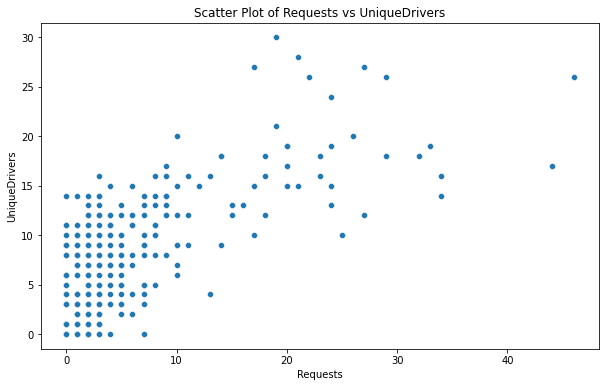

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Requests', y='UniqueDrivers', data=activity_df)
plt.title('Scatter Plot of Requests vs UniqueDrivers')
plt.xlabel('Requests')
plt.ylabel('UniqueDrivers')
plt.show()

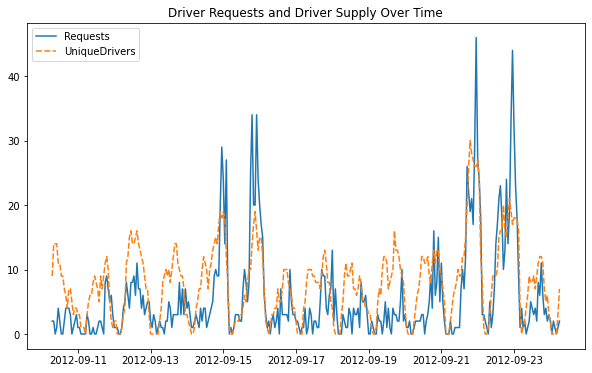

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data=activity_df[['Requests', 'UniqueDrivers']])
plt.title('Driver Requests and Driver Supply Over Time')
plt.show()

Based on the correlation coefficient and the scatterplot, requests and drivers generally move together. Looking at the lineplot, we can see drivers generally anticipate the busy times since upticks of the orange dotted line usually precedes the those of the blue lines. 
It also seems that on the weekdays supply outweighs demand, and then on the weekends depicted, supply falls short during the peak hours. 

---

#### 8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [ ]:
# do a rolling sum again, but for for a 72 hr period

In [ ]:
three_day_df = activity_df.resample('3D').sum()
three_day_df['zero_to_eye_ratio'] = three_day_df.Zeroes / three_day_df.Eyeballs
three_day_df.sort_values('zero_to_eye_ratio', ascending=False).head(1)

#### 9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing

#### 10. True or False: There is exactly two weeks of data in this analysis

#### 11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.

---